In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='age'>

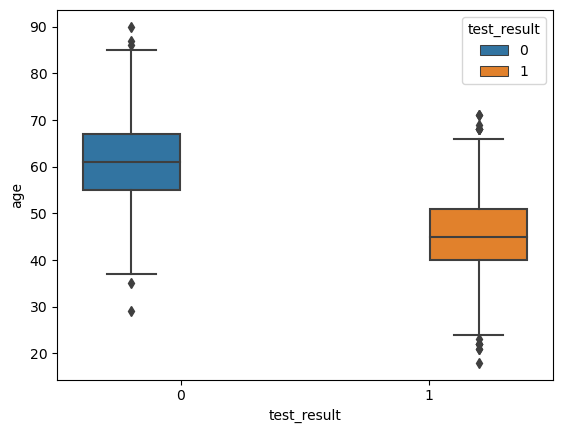

In [6]:
sns.boxplot(data = df, x="test_result", y ="age",hue="test_result")

<AxesSubplot:xlabel='age', ylabel='physical_score'>

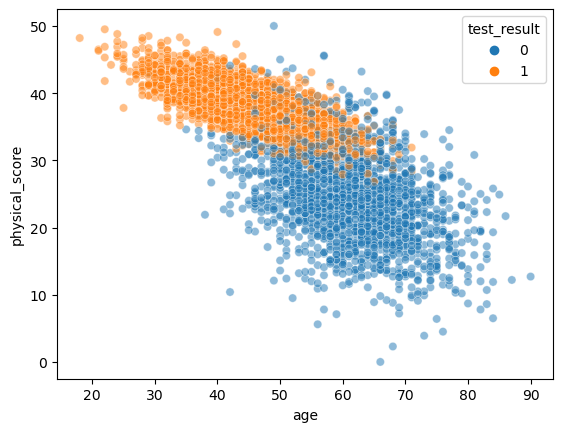

In [7]:
sns.scatterplot(data=df, x = "age", y = "physical_score", hue = "test_result", alpha = 0.5)

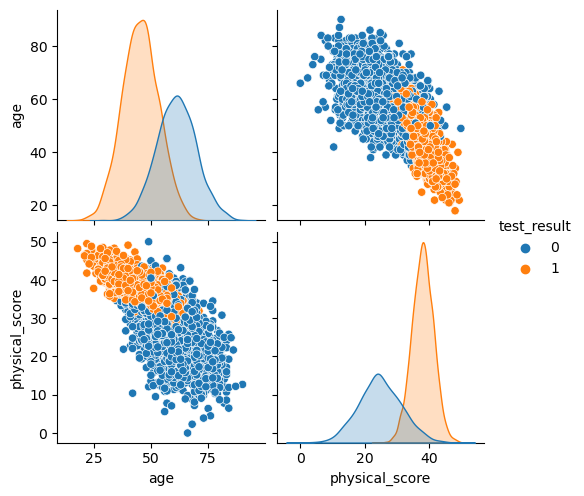

In [8]:
sns.pairplot(df,hue="test_result")

<AxesSubplot:>

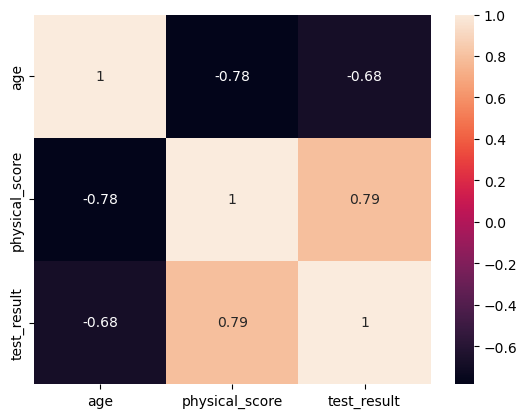

In [9]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

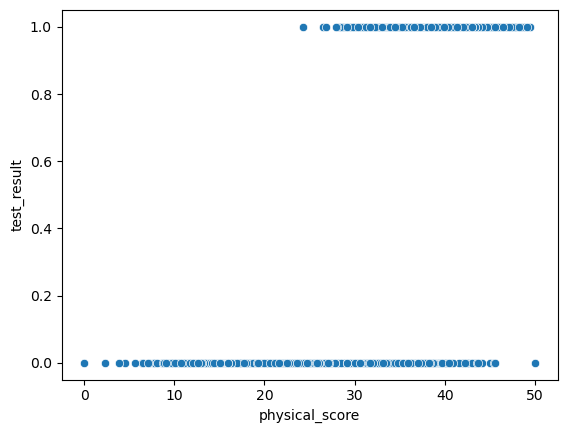

In [10]:
sns.scatterplot(data = df, x = "physical_score", y = "test_result")

In [11]:
from mpl_toolkits.mplot3D import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(df["age"], df["physical_score"],df["test_result"])

ModuleNotFoundError: No module named 'mpl_toolkits.mplot3D'

In [15]:
X = df.drop("test_result",axis=1)
y = df["test_result"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scalar = StandardScaler()

In [19]:
scalar.fit(X_train)

StandardScaler()

In [20]:
X_test = scalar.transform(X_test)

In [21]:
X_train = scalar.transform(X_train)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [25]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [27]:
y_pred = log_model.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.93

In [29]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [30]:
from sklearn.metrics import plot_confusion_matrix

D:\Downloads\Python\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


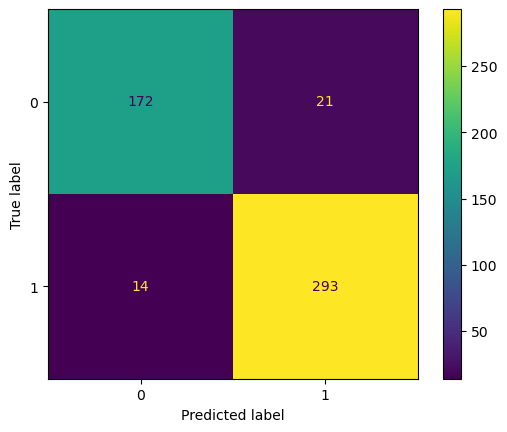

In [37]:
plot_confusion_matrix(log_model,X_test,y_test,)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [33]:
from sklearn.metrics import precision_score,recall_score

In [34]:
precision_score(y_test,y_pred)

0.9331210191082803

In [35]:
recall_score(y_test,y_pred)

0.9543973941368078

In [36]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

D:\Downloads\Python\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


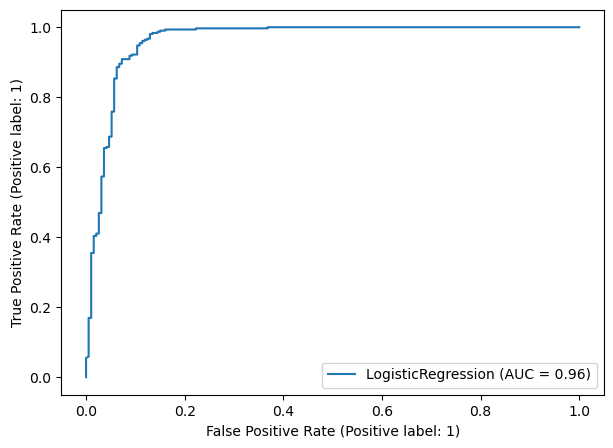

In [99]:
fig,ax = plt.subplots(figsize=(7,5))
plot_roc_curve(log_model,X_test,y_test,ax=ax)

D:\Downloads\Python\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


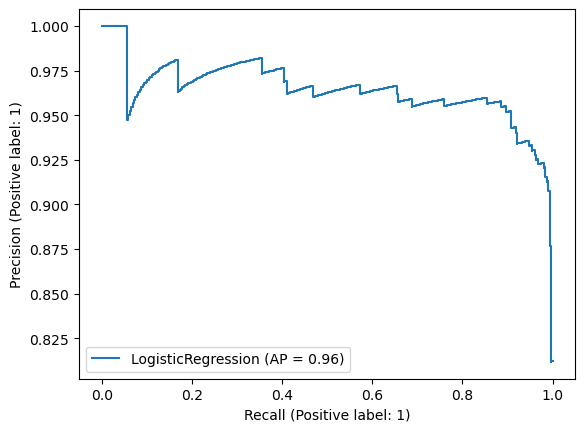

In [100]:
plot_precision_recall_curve(log_model,X_test,y_test)